In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 1: Regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, classification_report





## DATAFRAME

In [2]:
df = pd.read_csv("../data/processed/limpio1.csv")
df.head(1)

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder,Nutritional Deficiencies _Biotin Deficiency,...,Medications & Treatments_Antibiotics,Medications & Treatments_Antidepressants,Medications & Treatments_Antifungal Cream,Medications & Treatments_Blood Pressure Medication,Medications & Treatments_Chemotherapy,Medications & Treatments_Heart Medication,Medications & Treatments_Immunomodulators,Medications & Treatments_No Data,Medications & Treatments_Rogaine,Medications & Treatments_Steroids
0,1,19,0,1.0,0.0,1.0,1.0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Stress                                              999 non-null    int64  
 1   Age                                                 999 non-null    int64  
 2   Hair Loss                                           999 non-null    int64  
 3   Genetics_encoder                                    999 non-null    float64
 4   Hormones_encoder                                    999 non-null    float64
 5   HairCare_encoder                                    999 non-null    float64
 6   Environment_encoder                                 999 non-null    float64
 7   Smoking_encoder                                     999 non-null    float64
 8   Weight_encoder                                      999 non-null    float64
 9  

In [31]:
df.describe()

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
count,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,0.993994,34.188188,0.497497,0.522523,0.50951,0.492492,0.508509,0.519520,0.472472
std,0.805768,9.377980,0.500244,0.499743,0.50016,0.500194,0.500178,0.499869,0.499492
min,0.000000,18.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,34.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,42.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,2.000000,50.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


## VISUALIZACIONES

<Axes: >

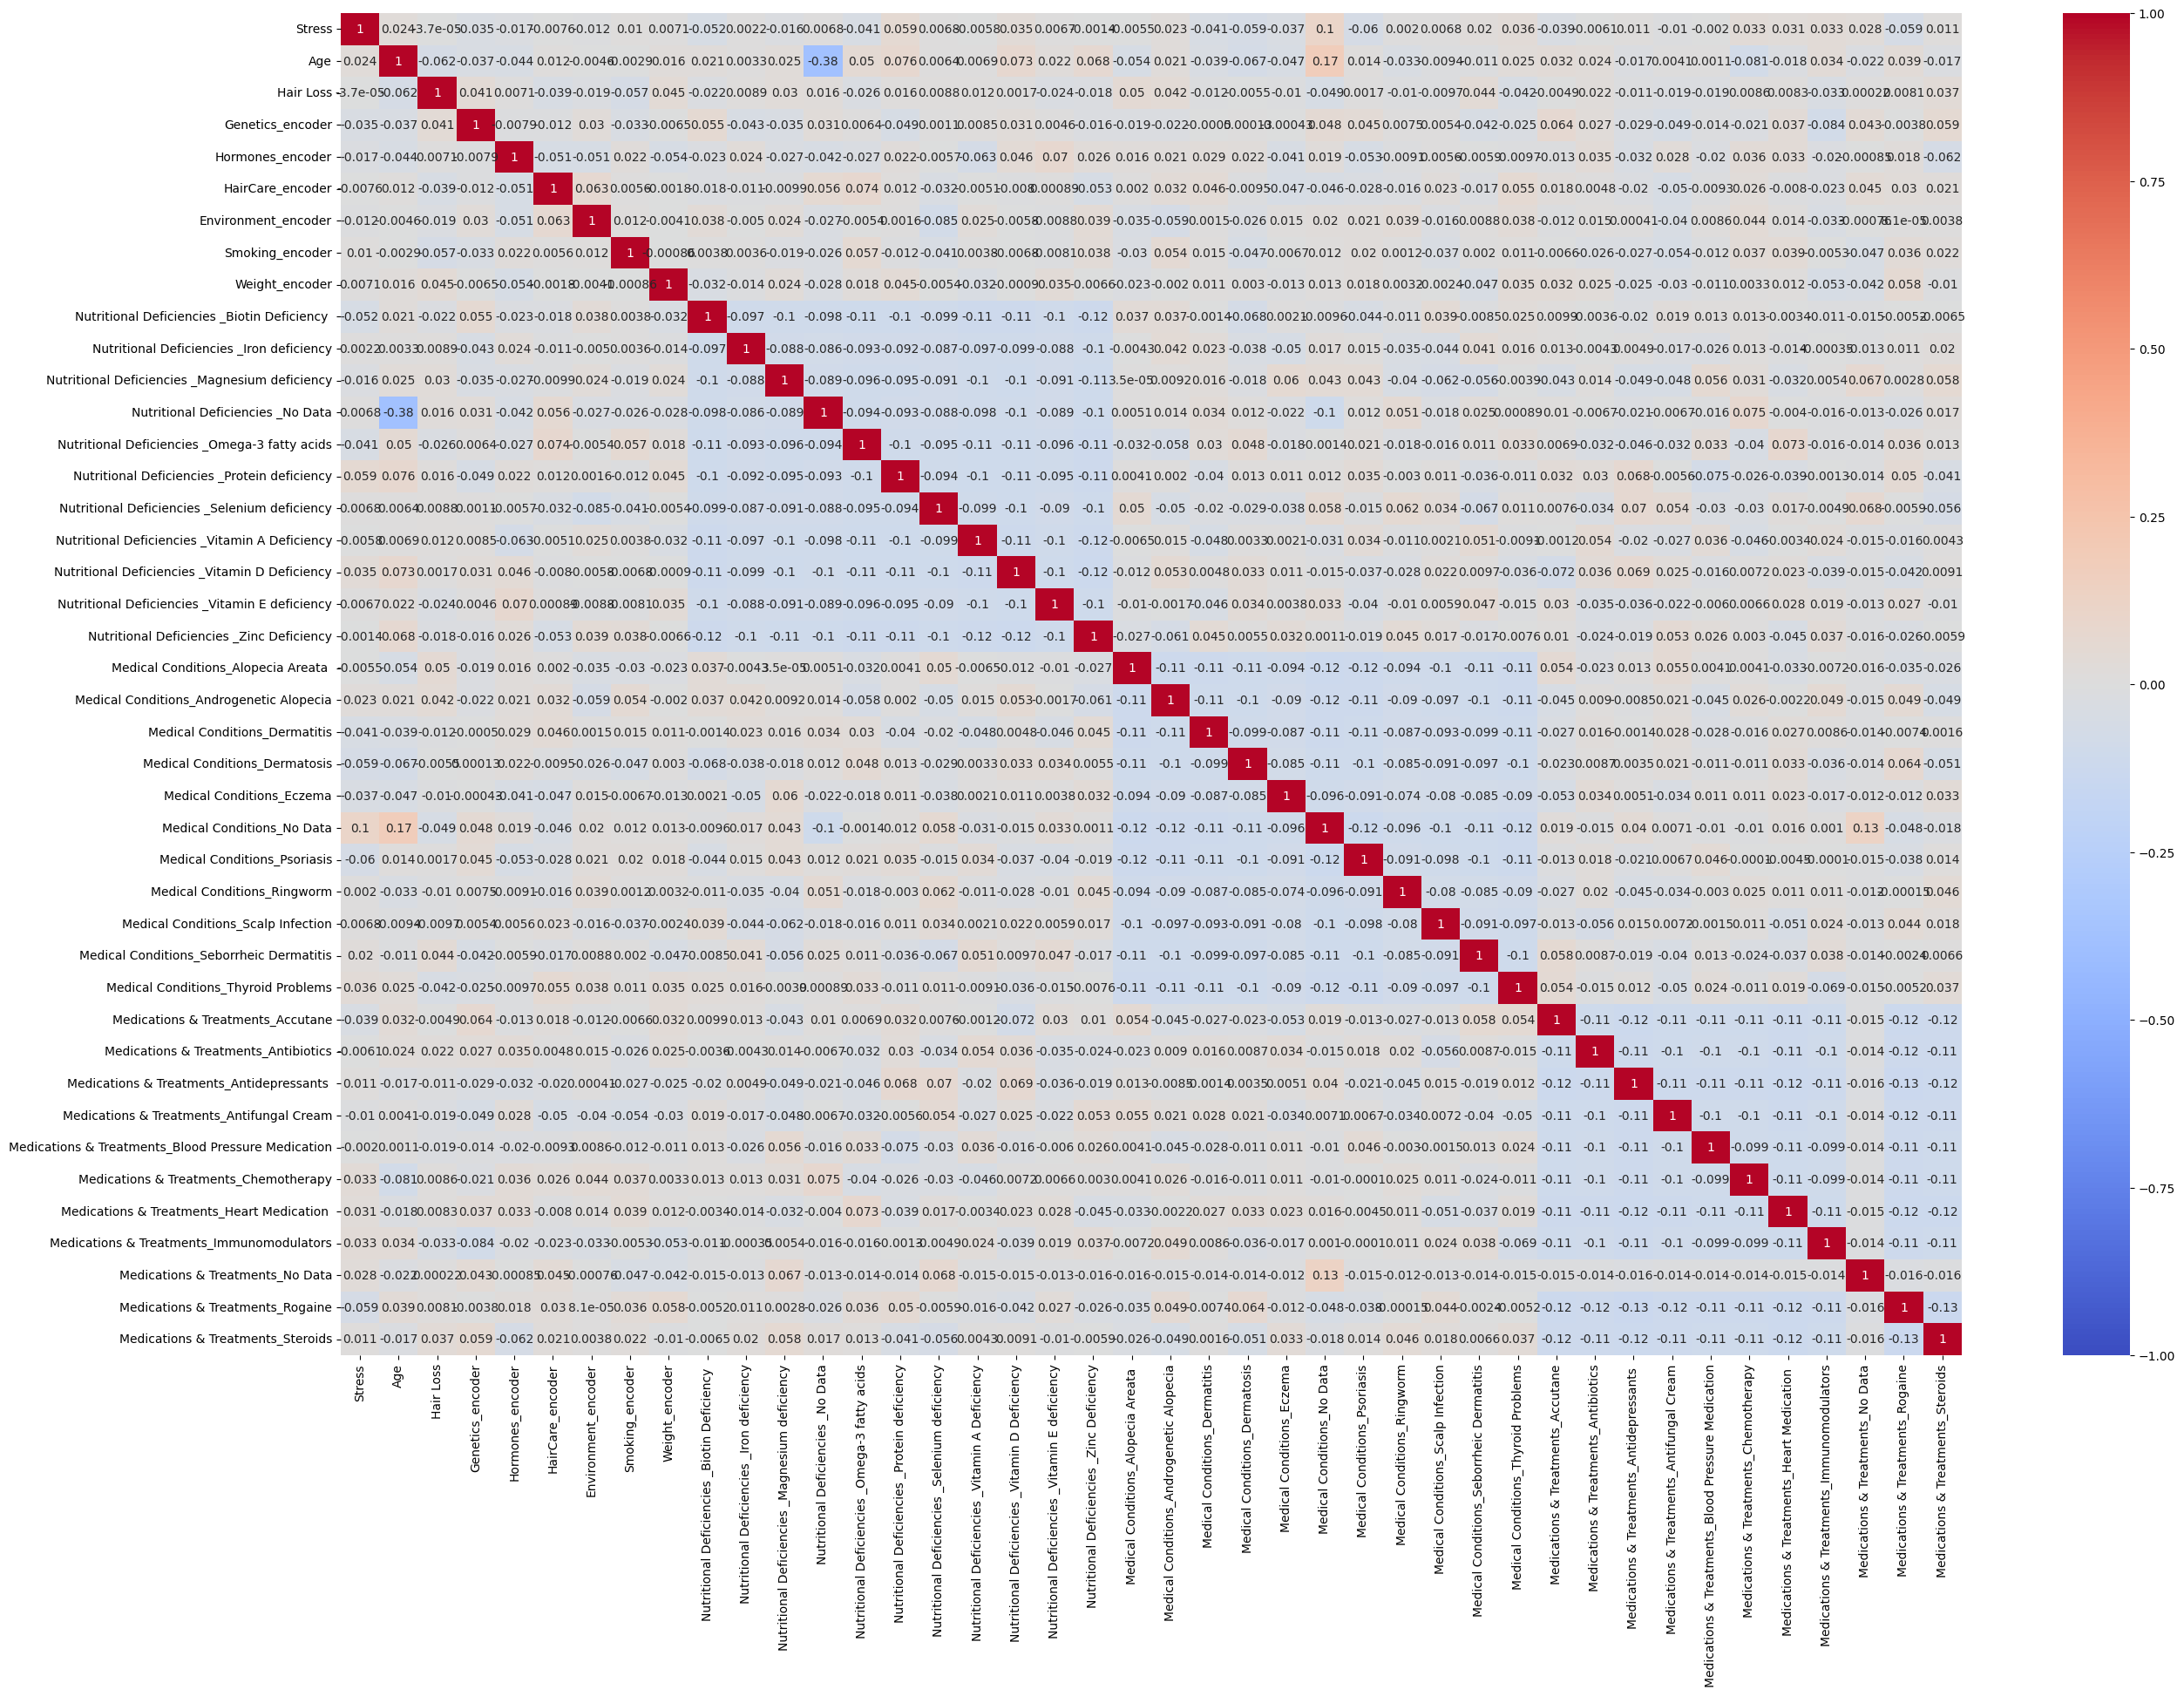

In [32]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

In [33]:
"""sns.pairplot(df, hue = "Hair Loss")"""

'sns.pairplot(df, hue = "Hair Loss")'

## MODELO

### Train test split

In [34]:
X = df.drop(columns = ["Hair Loss"])
y = df["Hair Loss"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 41)
(799,)
(200, 41)
(200,)


### Standard scaler

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled["Age"] = scaler.fit_transform(X_train[["Age"]])

X_test_scaled = X_test.copy()
X_test_scaled["Age"] = scaler.transform(X_test[["Age"]])


### Entrenar y predecir

In [37]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [38]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

### Evaluación

In [39]:
#CONFUSSION MATRIX:

confusion_matrix(y_test, y_pred)

array([[53, 55],
       [44, 48]])

In [ ]:
#PROBA:

y_proba = model.predict_proba(X_test_scaled)
print(y_proba[:5])  # Probabilidades de cada clase de las primeras 5 muestras



[[0.33661519 0.66338481]
 [0.49792654 0.50207346]
 [0.49718879 0.50281121]
 [0.40486154 0.59513846]
 [0.51246665 0.48753335]]


In [41]:
#ACCURACY:

accuracy_score(y_test, y_pred)

0.505

<Axes: >

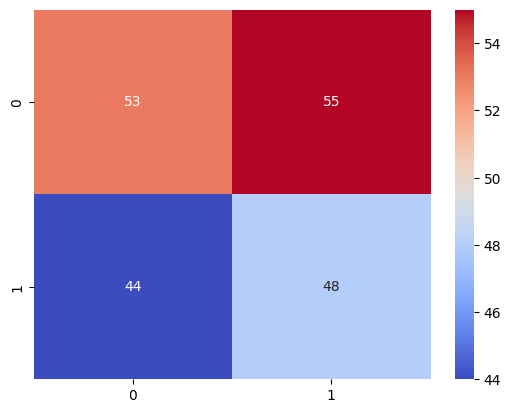

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap = "coolwarm",annot= True)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       108
           1       0.47      0.52      0.49        92

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200



<Axes: >

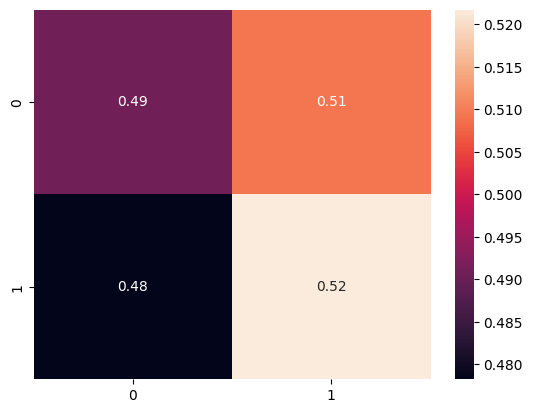

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize= "true"), annot= True)

In [45]:
model.score(X_test_scaled, y_test)


0.505

In [46]:
#ROC CURVE:
roc_auc_score(y_test, y_pred)

np.float64(0.5062399355877617)

In [47]:
pred_proba = model.predict_proba(X_test_scaled)
pred_proba

array([[0.33661519, 0.66338481],
       [0.49792654, 0.50207346],
       [0.49718879, 0.50281121],
       [0.40486154, 0.59513846],
       [0.51246665, 0.48753335],
       [0.44538968, 0.55461032],
       [0.5587775 , 0.4412225 ],
       [0.34952366, 0.65047634],
       [0.58317347, 0.41682653],
       [0.47621584, 0.52378416],
       [0.49096579, 0.50903421],
       [0.54789111, 0.45210889],
       [0.58172426, 0.41827574],
       [0.59979927, 0.40020073],
       [0.48346745, 0.51653255],
       [0.57907214, 0.42092786],
       [0.55030785, 0.44969215],
       [0.48654278, 0.51345722],
       [0.52206518, 0.47793482],
       [0.52044172, 0.47955828],
       [0.41032902, 0.58967098],
       [0.56937436, 0.43062564],
       [0.48506747, 0.51493253],
       [0.47175573, 0.52824427],
       [0.50034003, 0.49965997],
       [0.47179086, 0.52820914],
       [0.44572259, 0.55427741],
       [0.48335573, 0.51664427],
       [0.61129378, 0.38870622],
       [0.46460564, 0.53539436],
       [0.

In [48]:
fpr, tpr, t = roc_curve(y_test, pred_proba[:,1])

Text(0, 0.5, 'verdaderos positivos')

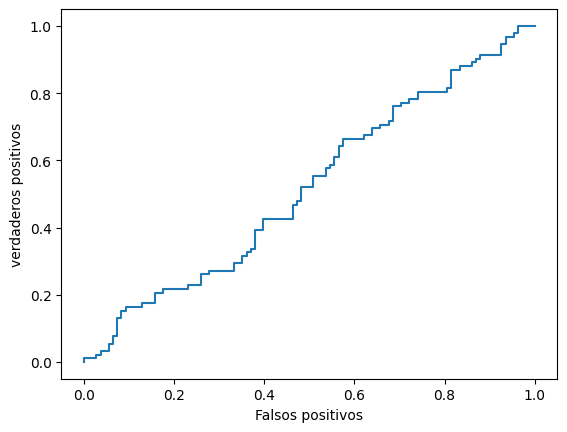

In [49]:
plt.plot(fpr, tpr)
plt.xlabel("Falsos positivos")
plt.ylabel("verdaderos positivos")

Text(0, 0.5, 'recall')

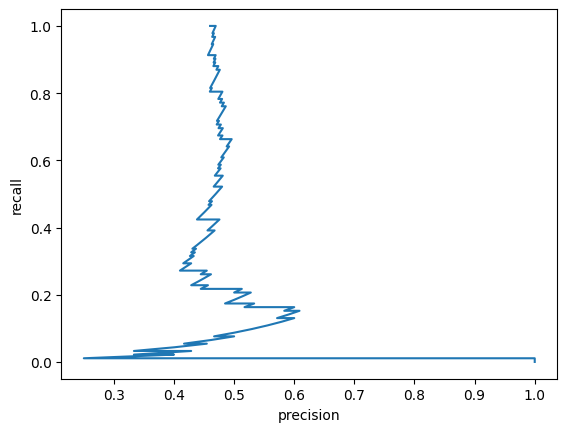

In [50]:
#P-R CURVE
precision, recall, t = precision_recall_curve(y_test, pred_proba[:,1])

plt.plot(precision, recall)

plt.xlabel("precision")
plt.ylabel("recall")


## PKL

In [51]:
import pickle
#guardar modelo
with open("../models/M1_LR.pkl", "wb") as f:
    pickle.dump(model, f)
    
#guardar scaler
with open("../models/M1_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)




In [52]:
# CARGAR el scaler
with open("../models/M1_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# CARGAR el modelo
with open("../models/M1_LR.pkl", "rb") as f:
    model = pickle.load(f)

X_test_scaled = X_test.copy()
X_test_scaled["Age"] = scaler.transform(X_test[["Age"]])


In [53]:
# HACER PREDICCIONES
y_pred = model.predict(X_test_scaled)